In [12]:
import pandas, matplotlib, json, urllib, numpy, PIL
from PIL import Image as img
import matplotlib.pyplot as plt
from IPython.display import SVG, Image, HTML
from PIL.ExifTags import TAGS
import shutil, os
from IPython.display import Image

In [10]:
def APOD(date, key, output_dir, hd=False, debug=False):
    """We will be pulling some data from the images."""
    request='https://api.nasa.gov/planetary/apod'
    key=key
    form={'date': date, 'api_key': key, 'hd':hd}
    query=urllib.parse.urlencode(form)
    APOD_request=urllib.request.urlopen(request+"?"+query)
    if debug==True:
        print(APOD_request.info())
    response=json.loads(APOD_request.read())
    ret = {}
    ret['Title'] = response['title']
    ret['Date']  = response['date']
    ret['Explanation'] = response['explanation']
    ret['URL'] = response['url']
    fname=str('APOD'+'_'+date+'.jpg')
    apod_img=urllib.request.urlretrieve(response['url'], fname)
    PIL_format=PIL.Image.open(fname)
    #print(PIL_format.info)
    try:
        exif_data = PIL_format._getexif()
        exif = {}
        for k,v in exif_data.items():
            if k in PIL.ExifTags.TAGS:
                exif[PIL.ExifTags.TAGS[k]] = v
    except Exception as e:
        print(e)
        exif=None
    shutil.move(fname, os.path.join(output_dir, fname))
    return ret, exif

In [11]:
APOD('2015-12-4', api_key, '.', hd=True)

({'Title': 'Cygnus: Bubble and Crescent',
  'Date': '2015-12-04',
  'Explanation': 'These clouds of gas and dust drift through rich star fields along the plane of our Milky Way Galaxy toward the high flying constellation Cygnus. Caught within the telescopic field of view are the Soap Bubble (lower left) and the Crescent Nebula (upper right). Both were formed at a final phase in the life of a star. Also known as NGC 6888, the Crescent was shaped as its bright, central massive Wolf-Rayet star, WR 136, shed its outer envelope in a strong stellar wind. Burning through fuel at a prodigious rate, WR 136 is near the end of a short life that should finish in a spectacular supernova explosion.  recently discovered Soap Bubble Nebula is likely a planetary nebula, the final shroud of a lower mass, long-lived, sun-like star destined to become a slowly cooling white dwarf. While both are some 5,000 light-years or so distant, the larger Crescent Nebula is around 25 light-years across.',
  'URL': 'ht

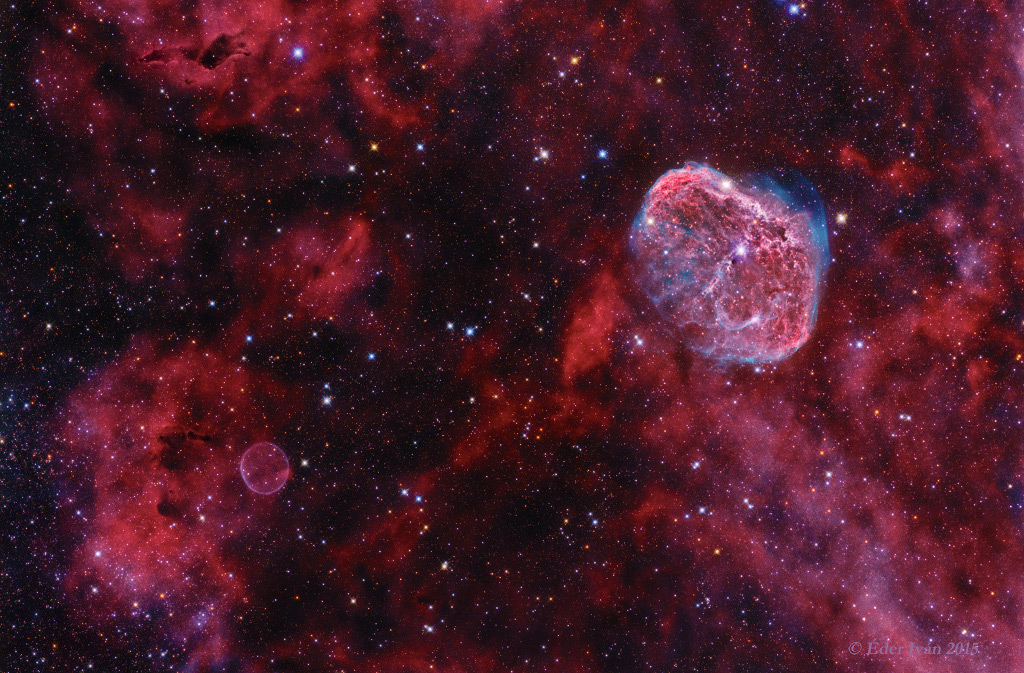

In [13]:
Image('./APOD_2015-12-4.jpg')

In [14]:
APOD('2016-5-5', api_key, '.', hd=True)

({'Title': 'The SONG and the Hunter',
  'Date': '2016-05-05',
  'Explanation': "Near first quarter, the Moon in March lights this snowy, rugged landscape, a view across the top of Tenerife toward La Palma in the Canary Islands Spanish archipelago. The large Teide volcano, the highest point in Spain, looms over the horizon. Shining above are familiar bright stars of Orion, the Hunter. Adding to the dreamlike scene is the 1 meter diameter prototype telescope of the global network project called the Stellar Observations Network Group or SONG. The SONG's fully robotic observatory was captured during the 30 second exposure while the observatory dome, with slit open, was rotated across the field of view.",
  'URL': 'https://apod.nasa.gov/apod/image/1605/IMG_5214_SONGandersen1024.JPG'},
 {'ResolutionUnit': 2,
  'ExifOffset': 204,
  'Make': 'Canon',
  'Model': 'Canon EOS 600D',
  'Artist': '',
  'Orientation': 1,
  'DateTime': '2016:05:04 15:05:55',
  'YCbCrPositioning': 2,
  'Copyright': '',


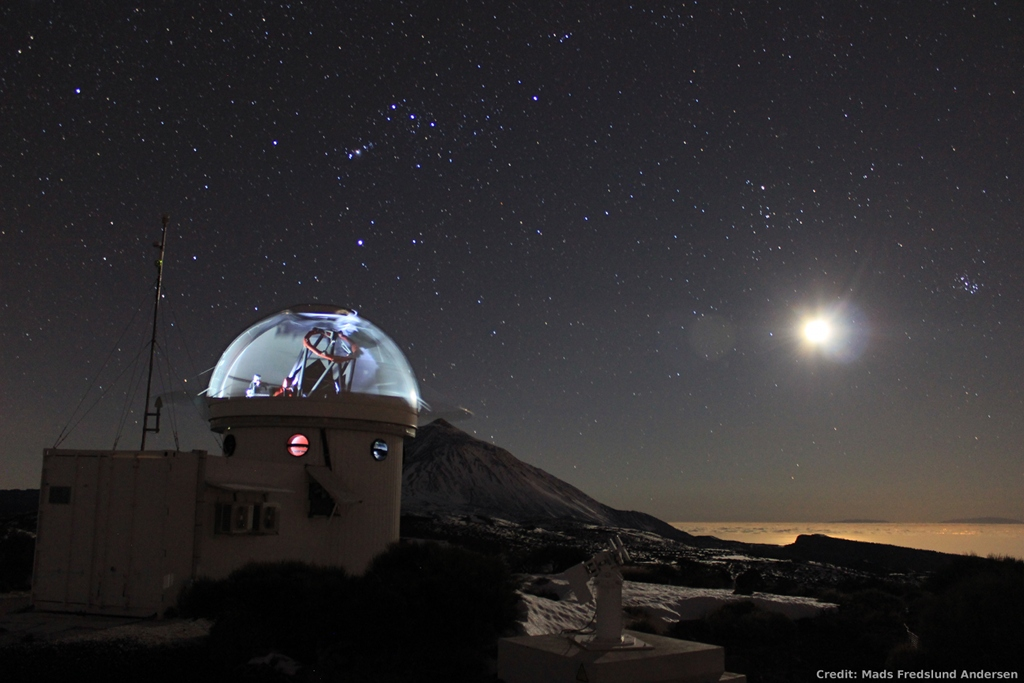

In [15]:
Image('./APOD_2016-5-5.jpg')

In [16]:
APOD('2018-7-31', api_key, '.', hd=True)

'NoneType' object has no attribute 'items'


({'Title': 'Layers of the South Pole of Mars',
  'Date': '2018-07-31',
  'Explanation': "What lies beneath the layered south pole of Mars? A recent measurement with ground-penetrating radar from ESA's Mars Express satellite has detected a bright reflection layer consistent with an underground lake of salty water. The reflection comes from about 1.5 kilometers down and covers an area 20 kilometers across. Liquid water evaporates quickly from the surface of Mars, but a briny confined lake, such as implied by the radar reflection, could last much longer and be a candidate to host life such as microbes.  Pictured, an infrared, green, and blue image of the south pole of Mars taken by Mars Express in 2012 shows a complex mixture of layers of dirt, frozen carbon dioxide, and frozen water.",
  'URL': 'https://apod.nasa.gov/apod/image/1807/SouthPole_MarsExpress_1080.jpg'},
 None)

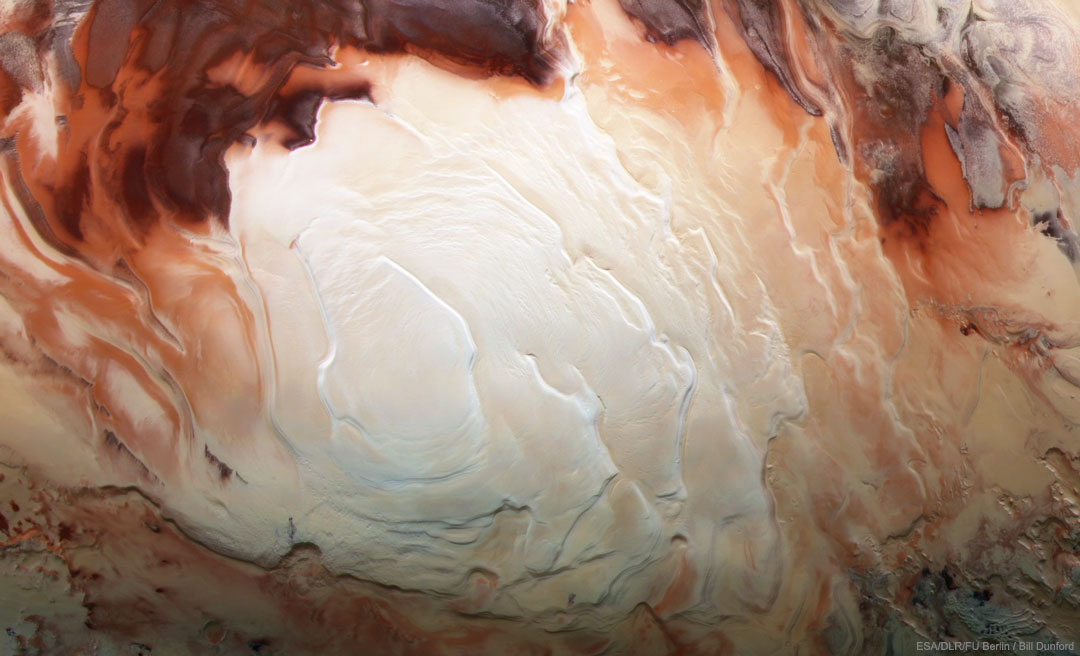

In [17]:
Image('./APOD_2018-7-31.jpg')